In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Contents
- user segment profiles
- pollution levels

In [3]:
df = pd.read_csv('../../data/final/final_data_bsfa.csv')

In [4]:
df.columns

Index(['index', 'num_trips', 'avg_duration', 'user_type_clean', 'date',
       'max_aqi', 'max_aqi_category', 'CO', 'NO2', 'OZONE', 'PM2.5', 'sta',
       'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres',
       'day_of_week', 'num_trips_res', 'avg_duration_res', 'max_aqi_res',
       'max_aqi_category_res', 'CO_res', 'NO2_res', 'OZONE_res', 'PM2.5_res',
       'tavg_res', 'tmin_res', 'tmax_res', 'wspd_res', 'pres_res'],
      dtype='object')

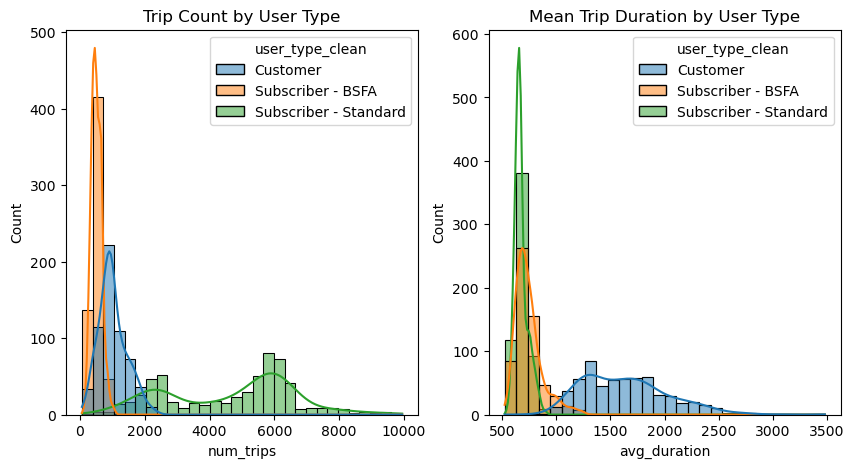

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=df, x='num_trips', hue='user_type_clean', kde=True, ax=axs[0]) \
    .set(title='Trip Count by User Type')
sns.histplot(data=df, x='avg_duration', hue='user_type_clean', kde=True, ax=axs[1]) \
    .set(title='Mean Trip Duration by User Type')
plt.savefig('user_target_distro.pdf')

<Axes: xlabel='avg_duration', ylabel='Count'>

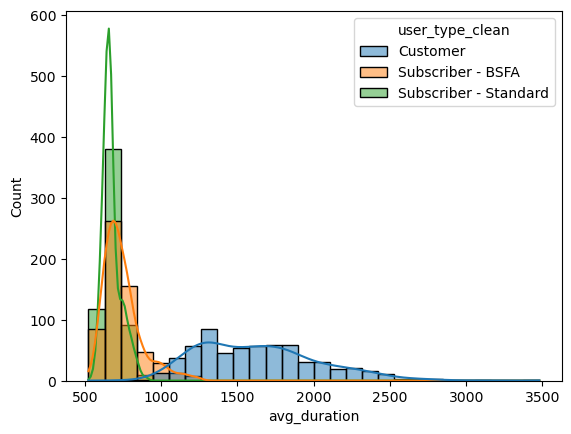

In [10]:
sns.histplot(data=df, x='avg_duration', hue='user_type_clean', kde=True)

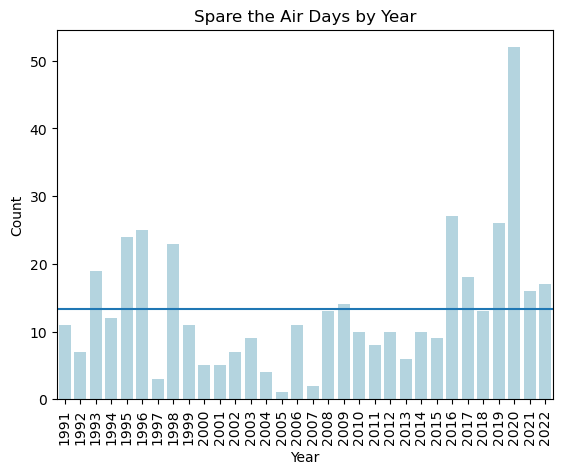

In [36]:
year = [
    2022,
    2021,
    2020,
    2019,
    2018,
    2017,
    2016,
    2015,
    2014,
    2013,
    2012,
    2011,
    2010,
    2009,
    2008,
    2007,
    2006,
    2005,
    2004,
    2003,
    2002,
    2001,
    2000,
    1999,
    1998,
    1997,
    1996,
    1995,
    1994,
    1993,
    1992,
    1991
]

sta_count = [
    17,
    16,
    52,
    26,
    13,
    18,
    27,
    9,
    10,
    6,
    10,
    8,
    10,
    14,
    13,
    2,
    11,
    1,
    4,
    9,
    7,
    5,
    5,
    11,
    23,
    3,
    25,
    24,
    12,
    19,
    7,
    11
]
mean_sta_count = np.mean(sta_count)
g = sns.barplot(x=year, y=sta_count, color='lightblue') 
g.set(title="Spare the Air Days by Year", xlabel='Year', ylabel='Count')
g.axhline(mean_sta_count)
plt.xticks(rotation=90)

plt.savefig('sta_counts.pdf')

In [33]:
mean_sta_count = np.mean(sta_count)

In [34]:
mean_sta_count

13.375

In [59]:
df_ozone = df[df['user_type_clean'] == 'Customer'][['date', 'OZONE', 'OZONE_res']]
df_pm = df_ozone = df[df['user_type_clean'] == 'Customer'][['date', 'PM2.5', 'PM2.5_res']]

In [50]:
df_ozone.head()

,date,OZONE,OZONE_res
0,2018-02-10,33.0,0.027682
1,2018-02-11,38.0,0.163265
2,2018-02-12,37.0,0.219780
3,2018-02-14,31.0,-0.044521
4,2018-02-15,37.0,0.043887


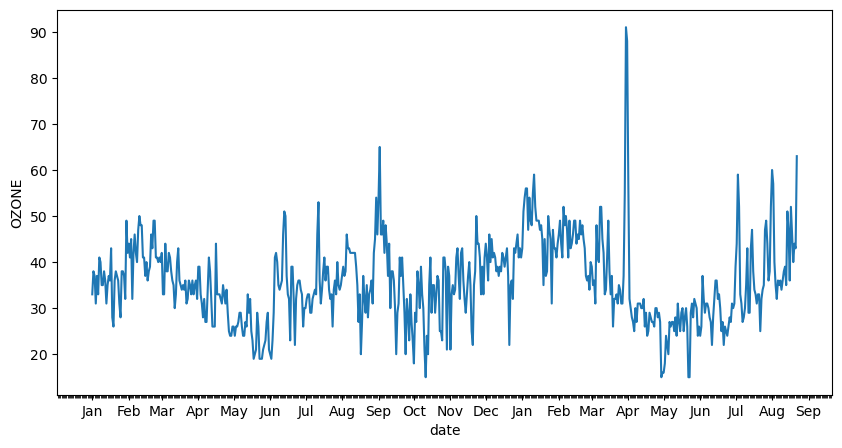

In [57]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
months_fmt = mdates.DateFormatter('%b')

fig, ax = plt.subplots(figsize = (10, 5))
sns.lineplot(data=df_ozone, x='date', y='OZONE')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(days)

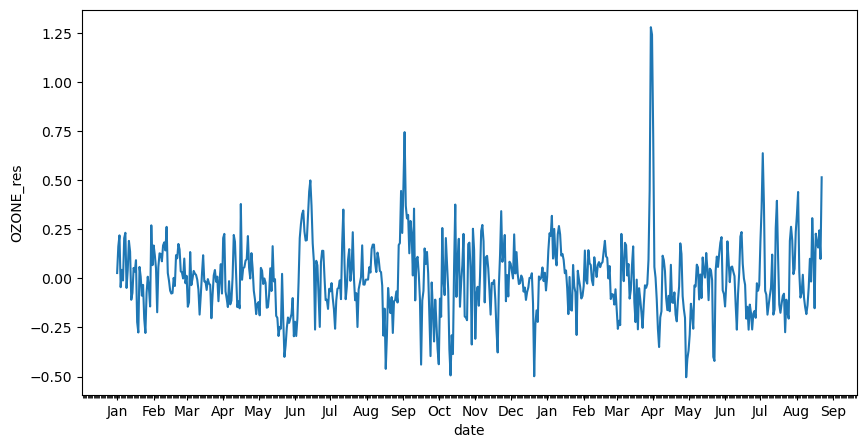

In [58]:
mdates.DayLocator()
months_fmt = mdates.DateFormatter('%b')

fig, ax = plt.subplots(figsize = (10, 5))
sns.lineplot(data=df_ozone, x='date', y='OZONE_res')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(days)


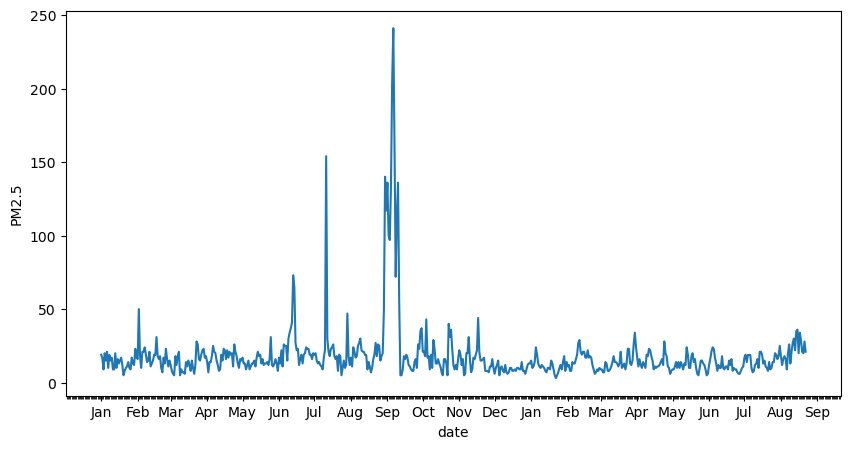

In [60]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
months_fmt = mdates.DateFormatter('%b')

fig, ax = plt.subplots(figsize = (10, 5))
sns.lineplot(data=df_pm, x='date', y='PM2.5')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(days)

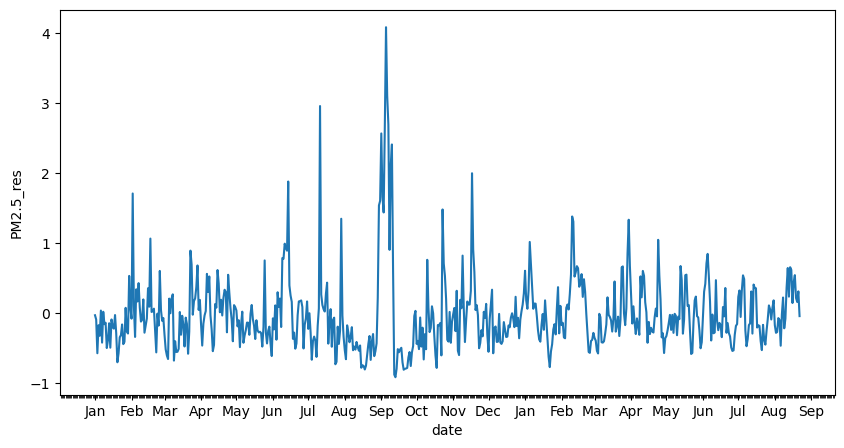

In [61]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
months_fmt = mdates.DateFormatter('%b')

fig, ax = plt.subplots(figsize = (10, 5))
sns.lineplot(data=df_pm, x='date', y='PM2.5_res')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(days)

In [62]:
sum(df.num_trips)

3696536